In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
similarity_df = pd.read_csv('C:/Users/joon6/OneDrive/Desktop/Covid Project/Python/SimilarityTable.csv')
country_dropped = similarity_df.drop(['location', 'b_location', 'c_location'], axis=1)
country_dropped = country_dropped.dropna()
scaled_df = StandardScaler().fit_transform(country_dropped)


In [3]:
# initialize kmeans parameters
kmeans_initialize = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}

In [4]:
# create list to hold SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_initialize)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

C:\Users\joon6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


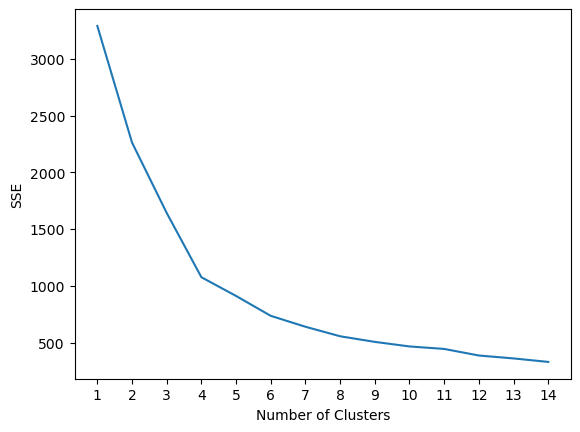

In [5]:

# visualize results
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
# Bend at k = 4, so 4 clusters are the most optimal


In [6]:

# using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

# fit k-means algorithm to data
kmeans.fit(scaled_df)

# append cluster assingments to original DataFrame
similarity_df['cluster'] = kmeans.labels_


In [20]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 5)

# view updated DataFrame
print(similarity_df)

              location  avg_stringency_index  ...  \
0          Afghanistan             29.475518  ...   
1              Albania             44.376051  ...   
2              Algeria             55.225142  ...   
3              Andorra             35.638486  ...   
4               Angola             55.445716  ...   
..                 ...                   ...  ...   
230  Wallis and Futuna              0.000000  ...   
231     Western Sahara              0.000000  ...   
232              Yemen             28.074693  ...   
233             Zambia             32.134156  ...   
234           Zimbabwe             62.042663  ...   

     max_human_development_index  cluster  
0                          0.511        2  
1                          0.795        5  
2                          0.748        6  
3                          0.868        2  
4                          0.581        2  
..                           ...      ...  
230                        0.000        4  
231        

In [11]:
# view cluster for Singapore
print(similarity_df.loc[similarity_df['location'] == 'Singapore', 'cluster'])


187    1
Name: cluster, dtype: int32


In [13]:
# list countries in cluster 1
c1_countries = (similarity_df.loc[similarity_df['cluster'] == 1, 'location']).tolist()
print(c1_countries)

print(len(c1_countries))

['Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brunei', 'Bulgaria', 'Canada', 'Chile', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Trinidad and Tobago', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
59


In [15]:
# There are 59 countries in cluster 1.
# We only need a few countries that are similar to Singapore
# rather than an optimization for all countries, so lets divide into more clusters.


# using  of clusters
kmeans = KMeans(init="random", n_clusters=10, n_init=10, random_state=1)

# fit k-means algorithm to data
kmeans.fit(scaled_df)

# append cluster assignments to original DataFrame
similarity_df['cluster'] = kmeans.labels_

In [24]:
# view updated DataFrame with cluster column values 
print(similarity_df)

              location  avg_stringency_index  ...  \
0          Afghanistan             29.475518  ...   
1              Albania             44.376051  ...   
2              Algeria             55.225142  ...   
3              Andorra             35.638486  ...   
4               Angola             55.445716  ...   
..                 ...                   ...  ...   
230  Wallis and Futuna              0.000000  ...   
231     Western Sahara              0.000000  ...   
232              Yemen             28.074693  ...   
233             Zambia             32.134156  ...   
234           Zimbabwe             62.042663  ...   

     max_human_development_index  cluster  
0                          0.511        2  
1                          0.795        5  
2                          0.748        6  
3                          0.868        2  
4                          0.581        2  
..                           ...      ...  
230                        0.000        4  
231        

In [17]:
# view cluster for Singapore
print(similarity_df.loc[similarity_df['location'] == 'Singapore', 'cluster'])
# Singapore is again assigned to cluster 1

187    1
Name: cluster, dtype: int32


In [19]:
# list countries in cluster 1
c1_countries = (similarity_df.loc[similarity_df['cluster'] == 1, 'location']).tolist()
print(c1_countries)

['Hong Kong', 'Luxembourg', 'Qatar', 'Singapore']
